# Пример работы с двухжидкостной неустойчивостью для карт

Пример на основе https://arxiv.org/pdf/1611.07672.pdf галактики ESO534-G001 и 2dFRS S833Z022

In [1]:
from IPython.display import HTML
from IPython.display import Image
import os
from PIL import Image as ImagePIL

%pylab
%matplotlib inline
%run ../../utils/load_notebook.py

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
from photometry import *

importing Jupyter notebook from photometry.ipynb
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
from instabilities import *

importing Jupyter notebook from instabilities.ipynb
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [4]:
from utils import *

importing Jupyter notebook from utils.ipynb


In [5]:
name = 'ESO534-G001'
gtype = 'SBm' #LEDA
incl = 74.0  #from arxiv
distance = 20.0 #Mpc, arxiv
scale = 0.097 #kpc/arcsec according to Noordermeer distance

data_path = '../../data/demo_data'
sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)
print sin_i, cos_i

0.961261695938 0.275637355817


In [6]:
%%javascript 
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h2 id="tocheading">Оглавление</h2>
<div id="toc"></div>

In [7]:
os.chdir(data_path)

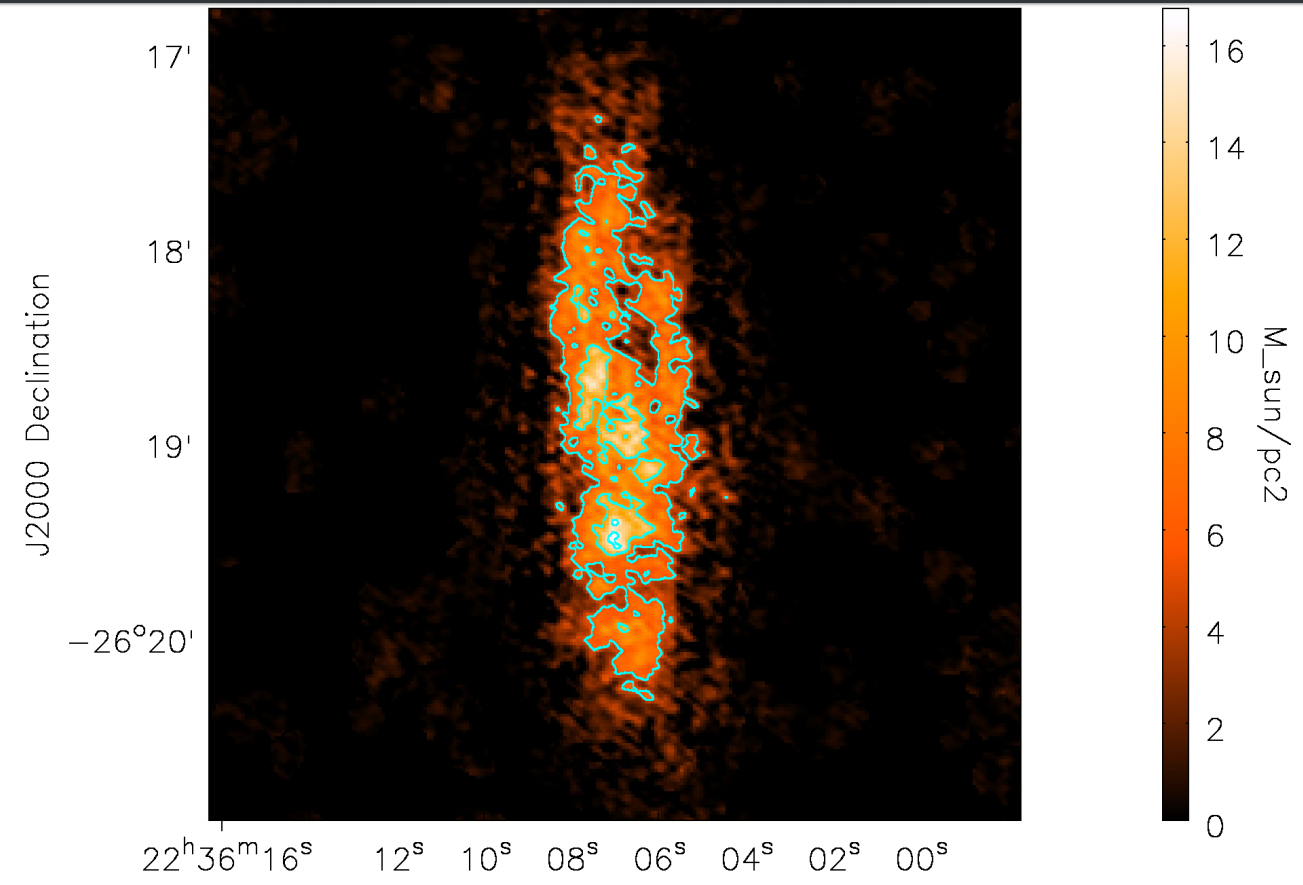

In [8]:
Image('full_HI_Sigma.png', width=700)

In [9]:
Sigma_raw = ImagePIL.open('HI_Sigma.png')

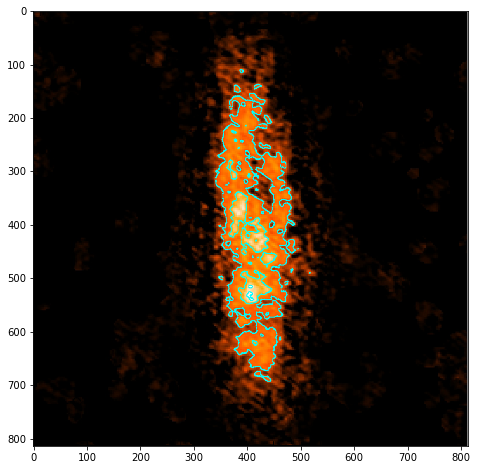

In [10]:
plt.figure(figsize=[8, 8])
plt.imshow(Sigma_raw)

In [11]:
Sigma_raw.height, Sigma_raw.width

(814, 814)

In [12]:
fdata = list(Sigma_raw.getdata())

In [13]:
np.array(fdata).shape, 814*814

((662596L, 4L), 662596)

In [14]:
def color_to_level(color):
    '''Вычисляем исходную величину из цвета'''
#     r, g, b = color
#     print color
    color = color[0:3]
    color_max = (255, 243, 234)
    level_max = 16.
#     color_min = (90, 31, 1)
#     level_min = 2.
    color_min = (0, 0, 0)
    level_min = 0.
    return level_min + (level_max-level_min)*np.mean((color- np.array(level_min))/(np.array(color_max) - np.array(level_min)))

In [15]:
X,Y = np.meshgrid(np.arange(0.,814,1), np.arange(0.,814,1))
Z = np.array(fdata).reshape(814, 814, 4)

In [16]:
# for i, row in enumerate(Z):
#     for j, col in enumerate(Z[i]):
#         if (Z[i][j] == np.array([0, 255, 255, 255])).all():
#             Z[i][j] = np.round((Z[i][j-1] + Z[i][j+1] + Z[i+1][j] + Z[i-1][j] + Z[i-1][j-1] + Z[i+1][j+1] + Z[i-1][j+1] + Z[i+1][j-1])/8.)

In [17]:
Z = np.apply_along_axis(color_to_level, 2, Z)

Z = Z[::-1, :] #inverse axes
# Z[Z < 0] = 0.

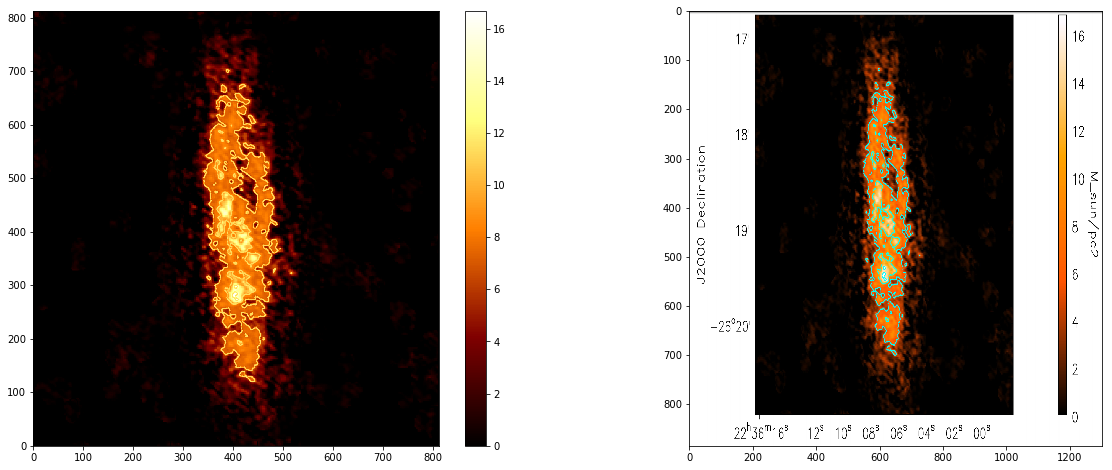

In [18]:
# ax1,ax2 = plt.subplots(ncols=2, nrows=1, figsize=[16, 8])
plt.figure(figsize=[20, 8])
plt.subplot(1, 2, 1)
quadmesh = plt.pcolormesh(X, Y, Z, cmap=cm.afmhot)
# quadmesh.set_clim(vmin=100., vmax=200.)
plt.colorbar()
# quadmesh.cmap.set_under('white')

plt.subplot(1, 2, 2)
plt.imshow(ImagePIL.open('full_HI_Sigma.png'), aspect=1.55);

In [19]:
color_to_level(array([0, 255, 255, 255])) # <- бирюзовый цвет, с которым проблемы 

11.408673630895853

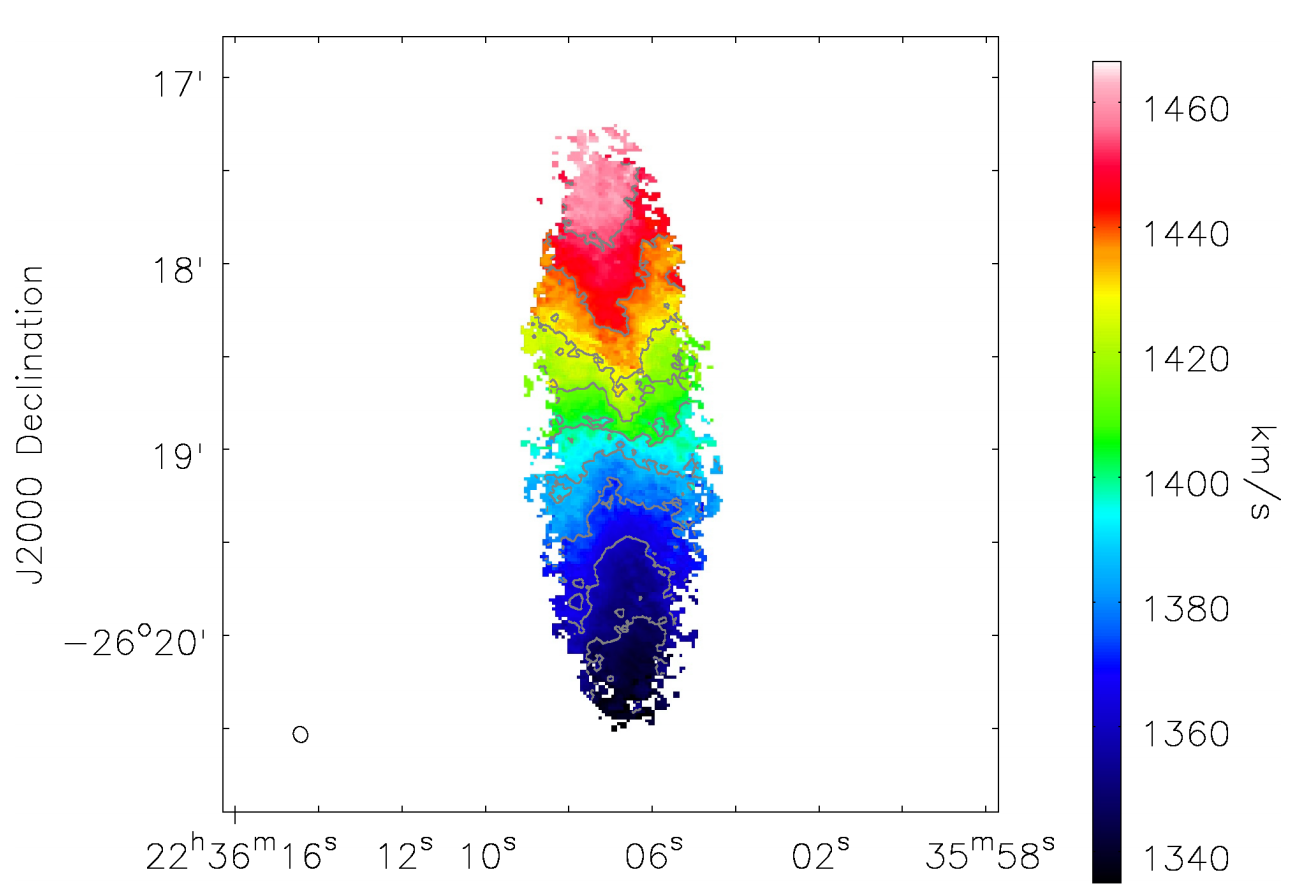

In [20]:
Image('full_Vc.png', width=700)

In [21]:
Vc_raw = ImagePIL.open('Vc.png')

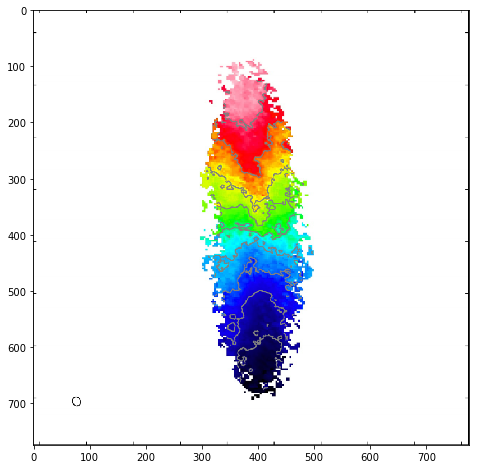

In [22]:
plt.figure(figsize=[8, 8])
plt.imshow(Vc_raw)

In [23]:
fdata = list(Vc_raw.getdata())

In [24]:
Vc_raw.height, Vc_raw.width

(775, 776)

In [25]:
def color_to_level(color):
    '''Вычисляем исходную величину из цвета'''
    color = color[0:3]
    color_max = (255, 153, 177)
    level_max = 1460.
    color_min = (3, 0, 39)
    level_min = 1340.
    return level_min + (level_max-level_min)*np.mean((color- np.array(color_min))/(np.array(color_max) - np.array(color_min)))
#     return level_min + (level_max-level_min)*np.mean((color- np.array(level_min))/(np.array(color_max) - np.array(level_min)))

In [26]:
color_to_level((3, 0, 39))

1340.0

In [27]:
color_to_level((255, 153, 177))

1460.0

In [28]:
color_to_level((255,255,255))

1460.0

In [29]:
color_to_level((0,0,0))

1260.0

In [30]:
color = (255, 153, 177)

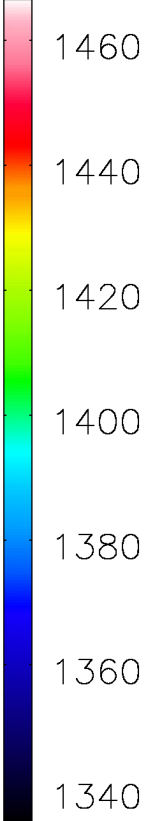

In [31]:
Image('Vc_colorbar.png')

In [32]:
vc_colorbar = ImagePIL.open('Vc_colorbar.png')

In [33]:
vc_colorbar.width, vc_colorbar.height

(148, 821)

In [34]:
vc_colorbar = np.array(list(vc_colorbar.getdata())).reshape(821, 148, 4)

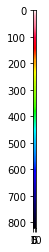

In [35]:
plt.imshow(vc_colorbar[:, 20:30, :].astype(np.uint8))

125 px = 20 km/s

In [36]:
(821-32-40)/120., 125./20.

(6.241666666666666, 6.25)

Да, вполне точно.

Нульпункт:

In [37]:
1340. - 32./6.241 

1334.8726165678577

In [38]:
vc_colorbar = vc_colorbar[:, 20:21, :]

In [39]:
vc_colorbar = vc_colorbar.reshape(821, 4)

In [40]:
vc_colorbar - np.array((3, 0, 39, 255))

array([[215, 215, 177,   0],
       [252, 244, 208,   0],
       [252, 243, 207,   0],
       ..., 
       [ -3,   0, -34,   0],
       [ -3,   0, -36,   0],
       [ -3,   0, -39,   0]])

In [41]:
np.argmin(np.linalg.norm(vc_colorbar - np.array((3, 0, 39, 255)), axis=1))

789

In [42]:
np.round(1334.87 + 789/6.241)

1461.0

In [55]:
def color_to_level(color):
    '''Вычисляем исходную величину из цвета'''
    argmin = np.argmin(np.linalg.norm(vc_colorbar - color, axis=1))
    return np.round(1334.87 + (821-argmin)/6.241)

In [56]:
color_to_level((3, 0, 39, 255))

1340.0

In [57]:
color_to_level((255, 153, 177, 255))

1460.0

In [58]:
color_to_level((255,255,255, 255))

1466.0

In [59]:
color_to_level((0,0,0, 255))

1335.0

In [60]:
X,Y = np.meshgrid(np.arange(0.,776,1), np.arange(0.,775,1))
Z = np.array(fdata).reshape(775, 776, 4)

In [85]:
# for i, row in enumerate(Z):
#     for j, col in enumerate(Z[i]):
#         if (Z[i][j] == np.array([255, 255, 255, 255])).all():
#             Z[i][j] = np.array([0,0,0,255])

In [61]:
Z = np.apply_along_axis(color_to_level, 2, Z)

Z = Z[::-1, :] #inverse axes
# Z[Z < 0] = 0.

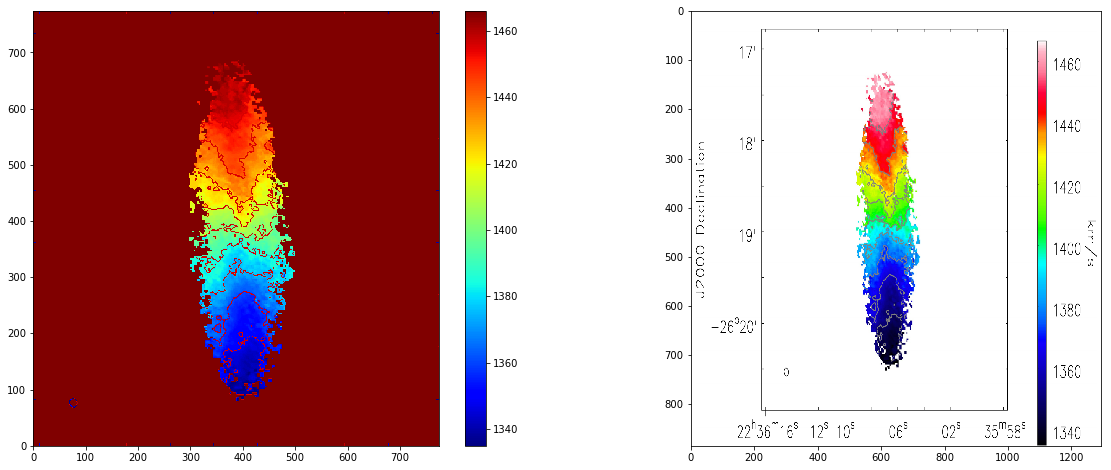

In [62]:
# ax1,ax2 = plt.subplots(ncols=2, nrows=1, figsize=[16, 8])
plt.figure(figsize=[20, 8])
plt.subplot(1, 2, 1)
quadmesh = plt.pcolormesh(X, Y, Z, cmap=cm.jet)
# quadmesh.set_clim(vmin=1330., vmax=1490.)
plt.colorbar()
quadmesh.cmap.set_under('white')

plt.subplot(1, 2, 2)
plt.imshow(ImagePIL.open('full_Vc.png'), aspect=1.55);